In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
import os

In [2]:
from google.colab import drive
drive.mount('/JanvierDrive')

Mounted at /JanvierDrive


In [3]:
train_dir = r'/JanvierDrive/MyDrive/AI-FELLOWSHIP/Landdataset/Train_data'
validation_dir = r'/JanvierDrive/MyDrive/AI-FELLOWSHIP/Landdataset/Validation'


### Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 720 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


BUILDING MODEL

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=720//16,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=200//16)

Epoch 1/20
45/45 [==============================] - 7s 151ms/step - loss: 0.5687 - acc: 0.7194 - val_loss: 0.6655 - val_acc: 0.6667
Epoch 2/20
45/45 [==============================] - 7s 152ms/step - loss: 0.5792 - acc: 0.7139 - val_loss: 0.6184 - val_acc: 0.7083
Epoch 3/20
45/45 [==============================] - 7s 152ms/step - loss: 0.6017 - acc: 0.6750 - val_loss: 0.6061 - val_acc: 0.6875
Epoch 4/20
45/45 [==============================] - 7s 151ms/step - loss: 0.5596 - acc: 0.7153 - val_loss: 0.5478 - val_acc: 0.7292
Epoch 5/20
45/45 [==============================] - 7s 151ms/step - loss: 0.5498 - acc: 0.7306 - val_loss: 0.5154 - val_acc: 0.7292
Epoch 6/20
45/45 [==============================] - 7s 150ms/step - loss: 0.5289 - acc: 0.7514 - val_loss: 0.6500 - val_acc: 0.6458
Epoch 7/20
45/45 [==============================] - 7s 150ms/step - loss: 0.4995 - acc: 0.7597 - val_loss: 0.5653 - val_acc: 0.7604
Epoch 8/20
45/45 [==============================] - 7s 152ms/step - loss: 0.

In [ ]:
loss,acc=model.evaluate_generator(train_generator)
loss,test_acc=model.evaluate_generator(validation_generator)
print("Training ACCURACY = {}\Testing Accuracy = {}".format(acc,test_acc))

Training ACCURACY = 0.8291666507720947\Testing Accuracy = 0.7950000166893005


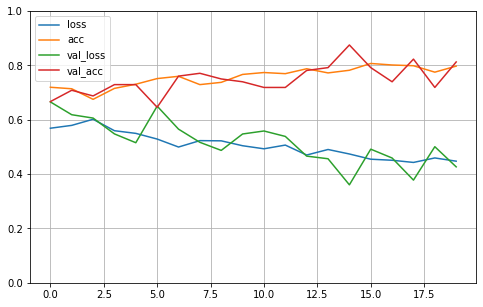

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Improvement 1

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=720//16,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=200//16)

Epoch 1/50
45/45 [==============================] - 8s 166ms/step - loss: 0.7173 - acc: 0.5431 - val_loss: 0.7067 - val_acc: 0.4948
Epoch 2/50
45/45 [==============================] - 7s 159ms/step - loss: 0.6918 - acc: 0.5083 - val_loss: 0.6928 - val_acc: 0.5312
Epoch 3/50
45/45 [==============================] - 7s 159ms/step - loss: 0.6796 - acc: 0.5472 - val_loss: 0.7339 - val_acc: 0.5104
Epoch 4/50
45/45 [==============================] - 7s 160ms/step - loss: 0.6610 - acc: 0.5764 - val_loss: 0.6385 - val_acc: 0.6562
Epoch 5/50
45/45 [==============================] - 7s 160ms/step - loss: 0.6393 - acc: 0.6611 - val_loss: 0.6784 - val_acc: 0.6354
Epoch 6/50
45/45 [==============================] - 7s 160ms/step - loss: 0.6041 - acc: 0.6917 - val_loss: 0.6348 - val_acc: 0.6979
Epoch 7/50
45/45 [==============================] - 7s 158ms/step - loss: 0.6285 - acc: 0.6222 - val_loss: 0.6588 - val_acc: 0.6458
Epoch 8/50
45/45 [==============================] - 7s 157ms/step - loss: 0.

In [ ]:
loss,acc=model.evaluate_generator(train_generator)
loss,test_acc=model.evaluate_generator(validation_generator)
print("Training ACCURACY = {}\Testing Accuracy = {}".format(acc,test_acc))

Training ACCURACY = 0.8680555820465088\Testing Accuracy = 0.8299999833106995


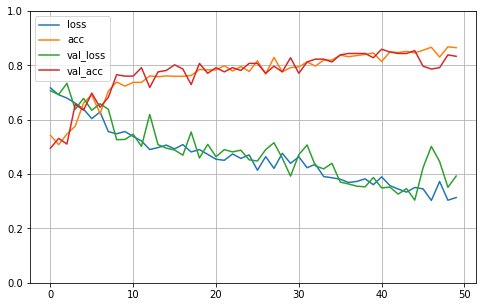

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Improvement 2

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow
from tensorflow.keras import regularizers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3),strides=(1,1), kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu',kernel_initializer='normal',kernel_regularizer=regularizers.l1(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                      

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=720//16,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=200//16)

Epoch 1/50
45/45 [==============================] - 9s 167ms/step - loss: 10.3736 - acc: 0.6625 - val_loss: 11.4705 - val_acc: 0.5052
Epoch 2/50
45/45 [==============================] - 7s 160ms/step - loss: 9.3344 - acc: 0.7472 - val_loss: 9.4400 - val_acc: 0.4948
Epoch 3/50
45/45 [==============================] - 7s 160ms/step - loss: 8.3554 - acc: 0.7611 - val_loss: 8.4457 - val_acc: 0.5052
Epoch 4/50
45/45 [==============================] - 7s 160ms/step - loss: 7.5977 - acc: 0.7611 - val_loss: 8.4501 - val_acc: 0.4948
Epoch 5/50
45/45 [==============================] - 7s 160ms/step - loss: 6.7915 - acc: 0.7903 - val_loss: 8.0919 - val_acc: 0.5000
Epoch 6/50
45/45 [==============================] - 7s 159ms/step - loss: 6.1421 - acc: 0.7806 - val_loss: 6.0971 - val_acc: 0.5312
Epoch 7/50
45/45 [==============================] - 7s 159ms/step - loss: 5.6011 - acc: 0.7931 - val_loss: 6.0665 - val_acc: 0.4948
Epoch 8/50
45/45 [==============================] - 7s 156ms/step - loss: 

In [ ]:
model.save("Land_model.h5")

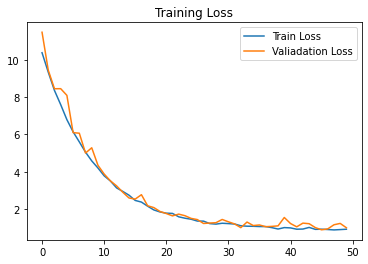

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.legend(['Train Loss','Valiadation Loss'])
plt.show()

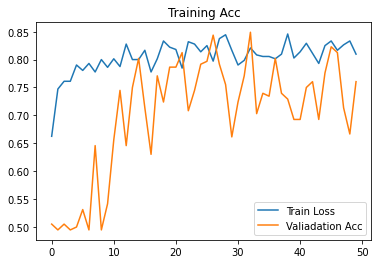

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training Acc')
plt.legend(['Train Loss','Valiadation Acc'])
plt.show()

In [ ]:
loss,acc=model.evaluate_generator(train_generator)
loss,test_acc=model.evaluate_generator(validation_generator)
print("Training ACCURACY = {}\Testing Accuracy = {}".format(acc,test_acc))

Training ACCURACY = 0.7986111044883728\Testing Accuracy = 0.7649999856948853


Improvement 3

In [ ]:
model = models.Sequential()
model.add(layers.BatchNormalization(input_shape=(150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3),strides=(1,1), kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu',kernel_initializer='normal',kernel_regularizer=regularizers.l1(1e-4)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_5 (Batc  (None, 150, 150, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                      

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=720//16,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=200//16)

Epoch 1/50
45/45 [==============================] - 9s 172ms/step - loss: 12.2552 - acc: 0.6681 - val_loss: 14.1392 - val_acc: 0.4792
Epoch 2/50
45/45 [==============================] - 7s 165ms/step - loss: 10.5824 - acc: 0.7236 - val_loss: 12.0866 - val_acc: 0.5052
Epoch 3/50
45/45 [==============================] - 7s 164ms/step - loss: 9.9637 - acc: 0.7375 - val_loss: 12.0687 - val_acc: 0.5052
Epoch 4/50
45/45 [==============================] - 7s 164ms/step - loss: 9.3476 - acc: 0.7597 - val_loss: 10.1871 - val_acc: 0.5625
Epoch 5/50
45/45 [==============================] - 7s 165ms/step - loss: 8.9371 - acc: 0.7472 - val_loss: 10.0093 - val_acc: 0.5104
Epoch 6/50
45/45 [==============================] - 7s 165ms/step - loss: 8.4822 - acc: 0.7931 - val_loss: 9.9929 - val_acc: 0.4948
Epoch 7/50
45/45 [==============================] - 7s 165ms/step - loss: 8.1416 - acc: 0.7792 - val_loss: 8.4101 - val_acc: 0.6198
Epoch 8/50
45/45 [==============================] - 7s 166ms/step - l

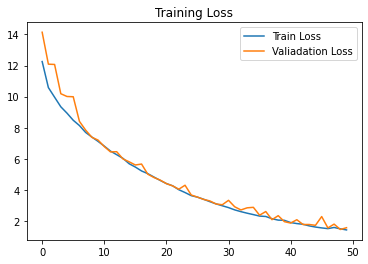

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.legend(['Train Loss','Valiadation Loss'])
plt.show()

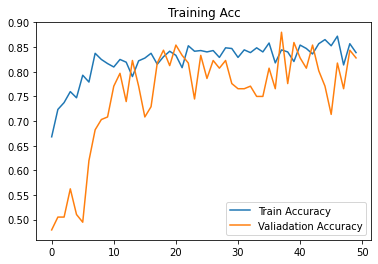

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training Acc')
plt.legend(['Train Accuracy','Valiadation Accuracy'])
plt.show()

In [ ]:
model.save("Land_model.h5")

In [ ]:
loss,acc=model.evaluate_generator(train_generator)
loss,test_acc=model.evaluate_generator(validation_generator)
print("Training ACCURACY = {}\Testing Accuracy = {}".format(acc,test_acc))

Training ACCURACY = 0.8722222447395325\Testing Accuracy = 0.8349999785423279


Improvement4

In [ ]:
model = models.Sequential()
model.add(layers.BatchNormalization(input_shape=(150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3),strides=(1,1), kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu',kernel_initializer='normal',kernel_regularizer=regularizers.l1(1e-4)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_15 (Bat  (None, 150, 150, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_16 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                      

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=720//16,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=200//16)

Epoch 1/100
45/45 [==============================] - 9s 173ms/step - loss: 12.7609 - acc: 0.6375 - val_loss: 13.1357 - val_acc: 0.5104
Epoch 2/100
45/45 [==============================] - 7s 164ms/step - loss: 11.4821 - acc: 0.7194 - val_loss: 14.4472 - val_acc: 0.5104
Epoch 3/100
45/45 [==============================] - 7s 163ms/step - loss: 11.1612 - acc: 0.7278 - val_loss: 17.9224 - val_acc: 0.4896
Epoch 4/100
45/45 [==============================] - 7s 164ms/step - loss: 10.9702 - acc: 0.7153 - val_loss: 16.8493 - val_acc: 0.5000
Epoch 5/100
45/45 [==============================] - 7s 163ms/step - loss: 10.6136 - acc: 0.7306 - val_loss: 13.1600 - val_acc: 0.5000
Epoch 6/100
45/45 [==============================] - 7s 164ms/step - loss: 10.3848 - acc: 0.6986 - val_loss: 11.3475 - val_acc: 0.5260
Epoch 7/100
45/45 [==============================] - 7s 163ms/step - loss: 9.8394 - acc: 0.7319 - val_loss: 10.1617 - val_acc: 0.6042
Epoch 8/100
45/45 [==============================] - 7s 

In [ ]:
loss,acc=model.evaluate_generator(train_generator)
loss,test_acc=model.evaluate_generator(validation_generator)
print("Training ACCURACY = {}\Testing Accuracy = {}".format(acc,test_acc))

Training ACCURACY = 0.8055555820465088\Testing Accuracy = 0.8199999928474426


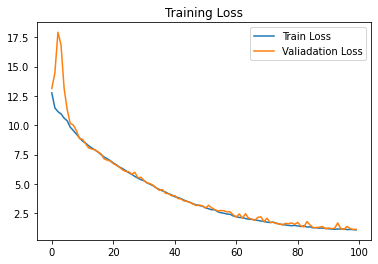

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.legend(['Train Loss','Valiadation Loss'])
plt.show()

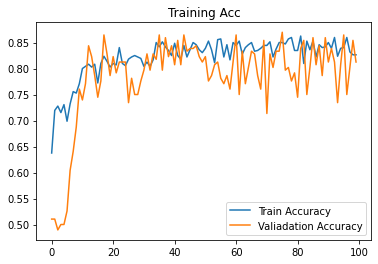

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training Acc')
plt.legend(['Train Accuracy','Valiadation Accuracy'])
plt.show()

IMPROVEMENT

In [ ]:
model = models.Sequential()
model.add(layers.BatchNormalization(input_shape=(150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3),strides=(1,1), kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu',kernel_initializer='normal',kernel_regularizer=regularizers.l1(1e-4)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 150, 150, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_2 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                      

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=720//16,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=200//16)

Epoch 1/50
45/45 [==============================] - 309s 7s/step - loss: 12.4027 - acc: 0.6361 - val_loss: 12.1944 - val_acc: 0.5052
Epoch 2/50
45/45 [==============================] - 7s 160ms/step - loss: 11.2012 - acc: 0.7056 - val_loss: 11.6153 - val_acc: 0.5104
Epoch 3/50
45/45 [==============================] - 7s 159ms/step - loss: 10.7039 - acc: 0.7111 - val_loss: 11.8075 - val_acc: 0.5000
Epoch 4/50
45/45 [==============================] - 7s 156ms/step - loss: 9.9280 - acc: 0.7319 - val_loss: 13.8270 - val_acc: 0.4948
Epoch 5/50
45/45 [==============================] - 7s 158ms/step - loss: 9.5798 - acc: 0.7431 - val_loss: 9.9206 - val_acc: 0.5052
Epoch 6/50
45/45 [==============================] - 7s 161ms/step - loss: 9.0716 - acc: 0.7500 - val_loss: 9.6147 - val_acc: 0.6042
Epoch 7/50
45/45 [==============================] - 7s 159ms/step - loss: 8.7627 - acc: 0.7583 - val_loss: 8.8186 - val_acc: 0.6615
Epoch 8/50
45/45 [==============================] - 7s 158ms/step - lo

In [ ]:
loss,acc=model.evaluate_generator(train_generator)
loss,test_acc=model.evaluate_generator(validation_generator)
print("Training ACCURACY = {}\Testing Accuracy = {}".format(acc,test_acc))

Training ACCURACY = 0.8166666626930237\Testing Accuracy = 0.7300000190734863


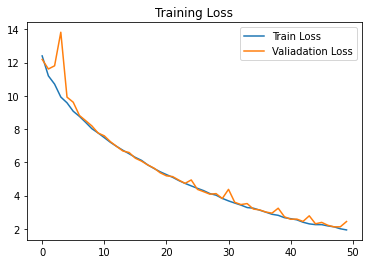

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.legend(['Train Loss','Valiadation Loss'])
plt.show()

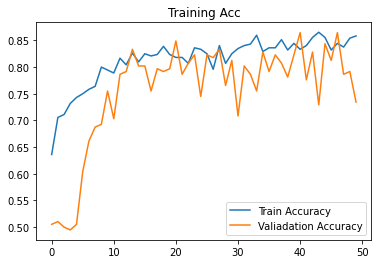

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training Acc')
plt.legend(['Train Accuracy','Valiadation Accuracy'])
plt.show()

IMPROVEMENT

In [ ]:
model = models.Sequential()
model.add(layers.BatchNormalization(input_shape=(150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3),strides=(1,1), kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu',kernel_initializer='normal',kernel_regularizer=regularizers.l1(1e-4)))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Batc  (None, 150, 150, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_7 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                      

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=720//16,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=200//16)

Epoch 1/100
45/45 [==============================] - 9s 167ms/step - loss: 12.2881 - acc: 0.6486 - val_loss: 10.9106 - val_acc: 0.5104
Epoch 2/100
45/45 [==============================] - 7s 160ms/step - loss: 11.4174 - acc: 0.6806 - val_loss: 13.3115 - val_acc: 0.5052
Epoch 3/100
45/45 [==============================] - 7s 158ms/step - loss: 10.5624 - acc: 0.7194 - val_loss: 14.4794 - val_acc: 0.5156
Epoch 4/100
45/45 [==============================] - 7s 159ms/step - loss: 10.0543 - acc: 0.7264 - val_loss: 15.7681 - val_acc: 0.5052
Epoch 5/100
45/45 [==============================] - 7s 157ms/step - loss: 9.5104 - acc: 0.7736 - val_loss: 12.1664 - val_acc: 0.5052
Epoch 6/100
45/45 [==============================] - 7s 158ms/step - loss: 9.1204 - acc: 0.7708 - val_loss: 9.7190 - val_acc: 0.5677
Epoch 7/100
45/45 [==============================] - 7s 157ms/step - loss: 8.8985 - acc: 0.7597 - val_loss: 9.1824 - val_acc: 0.5938
Epoch 8/100
45/45 [==============================] - 7s 156m

In [ ]:
loss,acc=model.evaluate_generator(train_generator)
loss,test_acc=model.evaluate_generator(validation_generator)
print("Training ACCURACY = {}\Testing Accuracy = {}".format(acc,test_acc))

Training ACCURACY = 0.8402777910232544\Testing Accuracy = 0.800000011920929


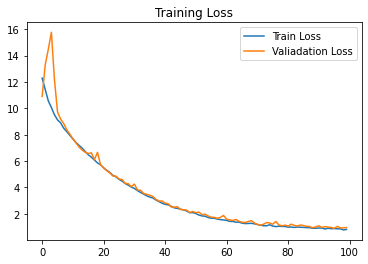

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.legend(['Train Loss','Valiadation Loss'])
plt.show()

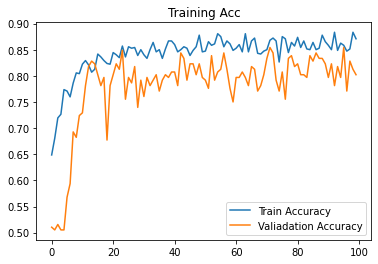

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training Acc')
plt.legend(['Train Accuracy','Valiadation Accuracy'])
plt.show()

improvement

In [ ]:
model = models.Sequential()
model.add(layers.BatchNormalization(input_shape=(150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3),strides=(1,1), kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu',kernel_initializer='normal',kernel_regularizer=regularizers.l1(1e-4)))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_11 (Bat  (None, 150, 150, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                      

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=720//16,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=200//16)

Epoch 1/100
45/45 [==============================] - 9s 167ms/step - loss: 11.8946 - acc: 0.6986 - val_loss: 11.0962 - val_acc: 0.4948
Epoch 2/100
45/45 [==============================] - 7s 158ms/step - loss: 10.7208 - acc: 0.7125 - val_loss: 12.0595 - val_acc: 0.5000
Epoch 3/100
45/45 [==============================] - 7s 158ms/step - loss: 10.0006 - acc: 0.7472 - val_loss: 11.7599 - val_acc: 0.5052
Epoch 4/100
45/45 [==============================] - 7s 158ms/step - loss: 9.4092 - acc: 0.7750 - val_loss: 11.5124 - val_acc: 0.4948
Epoch 5/100
45/45 [==============================] - 7s 159ms/step - loss: 9.0066 - acc: 0.7736 - val_loss: 10.6630 - val_acc: 0.5156
Epoch 6/100
45/45 [==============================] - 7s 159ms/step - loss: 8.6986 - acc: 0.7708 - val_loss: 9.4360 - val_acc: 0.5365
Epoch 7/100
45/45 [==============================] - 7s 157ms/step - loss: 8.2729 - acc: 0.7986 - val_loss: 9.0111 - val_acc: 0.5521
Epoch 8/100
45/45 [==============================] - 7s 157ms

In [ ]:
loss,acc=model.evaluate_generator(train_generator)
loss,test_acc=model.evaluate_generator(validation_generator)
print("Training ACCURACY = {}\Testing Accuracy = {}".format(acc,test_acc))

Training ACCURACY = 0.8569444417953491\Testing Accuracy = 0.7850000262260437


improvement5

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3),strides=(1,1), kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu',kernel_initializer='normal',kernel_regularizer=regularizers.l1(1e-4)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 11, 11, 128)     

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=720/16,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=200/16)

Epoch 1/100
45/45 [==============================] - 8s 162ms/step - loss: 7.5544 - acc: 0.5597 - val_loss: 5.0020 - val_acc: 0.5000
Epoch 2/100
45/45 [==============================] - 7s 152ms/step - loss: 3.5958 - acc: 0.5611 - val_loss: 2.5202 - val_acc: 0.6200
Epoch 3/100
45/45 [==============================] - 7s 154ms/step - loss: 2.0316 - acc: 0.6028 - val_loss: 1.7172 - val_acc: 0.5650
Epoch 4/100
45/45 [==============================] - 7s 153ms/step - loss: 1.4228 - acc: 0.6125 - val_loss: 1.2957 - val_acc: 0.5500
Epoch 5/100
45/45 [==============================] - 7s 151ms/step - loss: 1.1502 - acc: 0.6139 - val_loss: 1.0440 - val_acc: 0.6800
Epoch 6/100
45/45 [==============================] - 7s 152ms/step - loss: 0.9678 - acc: 0.6778 - val_loss: 0.9480 - val_acc: 0.6650
Epoch 7/100
45/45 [==============================] - 7s 151ms/step - loss: 0.8744 - acc: 0.6833 - val_loss: 0.8702 - val_acc: 0.6550
Epoch 8/100
45/45 [==============================] - 7s 152ms/step - 

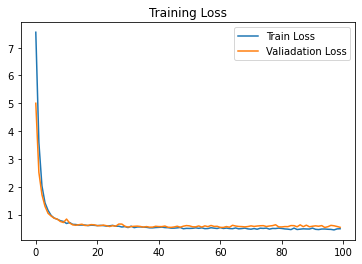

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.legend(['Train Loss','Valiadation Loss'])
plt.show()

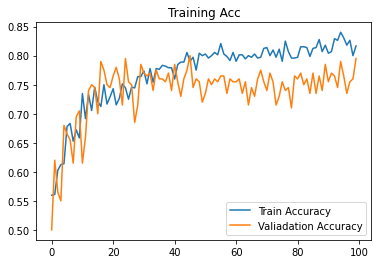

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training Acc')
plt.legend(['Train Accuracy','Valiadation Accuracy'])
plt.show()

In [ ]:
loss,acc=model.evaluate_generator(train_generator)
loss,test_acc=model.evaluate_generator(validation_generator)
print("Training ACCURACY = {}\Testing Accuracy = {}".format(acc,test_acc))

Training ACCURACY = 0.8416666388511658\Testing Accuracy = 0.7950000166893005


improvement

In [ ]:
#no Dropout

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3),strides=(1,1), kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), strides=(1,1),kernel_initializer='normal', kernel_regularizer=regularizers.l1(1e-4),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu',kernel_initializer='normal',kernel_regularizer=regularizers.l1(1e-4)))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 11, 11, 128)     

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=720//16,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=720//16)

Epoch 1/50
45/45 [==============================] - 8s 160ms/step - loss: 7.8467 - acc: 0.5375 - val_loss: 5.3564 - val_acc: 0.6800
Epoch 2/50
45/45 [==============================] - 6s 140ms/step - loss: 4.0726 - acc: 0.6194
Epoch 3/50
45/45 [==============================] - 6s 139ms/step - loss: 2.5596 - acc: 0.6375
Epoch 4/50
45/45 [==============================] - 6s 139ms/step - loss: 1.8987 - acc: 0.6889
Epoch 5/50
45/45 [==============================] - 6s 139ms/step - loss: 1.5241 - acc: 0.6778
Epoch 6/50
45/45 [==============================] - 6s 138ms/step - loss: 1.2913 - acc: 0.6986
Epoch 7/50
45/45 [==============================] - 6s 139ms/step - loss: 1.1295 - acc: 0.7125
Epoch 8/50
45/45 [==============================] - 6s 139ms/step - loss: 1.0091 - acc: 0.6847
Epoch 9/50
45/45 [==============================] - 6s 139ms/step - loss: 0.9166 - acc: 0.7208
Epoch 10/50
45/45 [==============================] - 6s 139ms/step - loss: 0.8394 - acc: 0.7347
Epoch 11/50


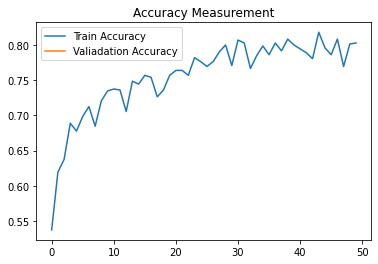

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy Measurement')
plt.legend(['Train Accuracy','Valiadation Accuracy'])
plt.show()

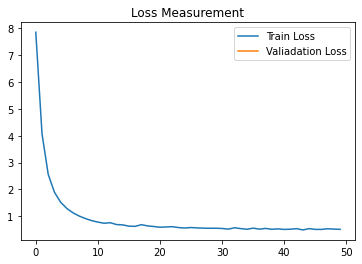

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Measurement')
plt.legend(['Train Loss','Valiadation Loss'])
plt.show()

In [ ]:
loss,acc=model.evaluate_generator(train_generator)
loss,test_acc=model.evaluate_generator(validation_generator)
print("Training ACCURACY = {}\Testing Accuracy = {}".format(acc,test_acc))

Training ACCURACY = 0.800000011920929\Testing Accuracy = 0.7300000190734863


improvement

In [ ]:
model = models.Sequential()
model.add(layers.BatchNormalization(input_shape=(150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3),strides=(1,1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),strides=(1,1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3),strides=(1,1),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), strides=(1,1),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=720//16,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=200//16)

Epoch 1/50
45/45 [==============================] - 9s 165ms/step - loss: 1.4121 - acc: 0.6847 - val_loss: 0.8778 - val_acc: 0.4844
Epoch 2/50
45/45 [==============================] - 7s 156ms/step - loss: 0.6585 - acc: 0.7486 - val_loss: 1.0612 - val_acc: 0.4375
Epoch 3/50
45/45 [==============================] - 7s 157ms/step - loss: 0.6063 - acc: 0.7153 - val_loss: 1.3738 - val_acc: 0.5000
Epoch 4/50
45/45 [==============================] - 7s 157ms/step - loss: 0.5405 - acc: 0.7722 - val_loss: 1.2818 - val_acc: 0.4948
Epoch 5/50
45/45 [==============================] - 7s 157ms/step - loss: 0.5163 - acc: 0.7694 - val_loss: 1.5032 - val_acc: 0.5208
Epoch 6/50
45/45 [==============================] - 7s 157ms/step - loss: 0.5205 - acc: 0.7639 - val_loss: 0.9739 - val_acc: 0.5469
Epoch 7/50
45/45 [==============================] - 7s 158ms/step - loss: 0.4398 - acc: 0.8264 - val_loss: 0.6771 - val_acc: 0.7344
Epoch 8/50
45/45 [==============================] - 7s 157ms/step - loss: 0.

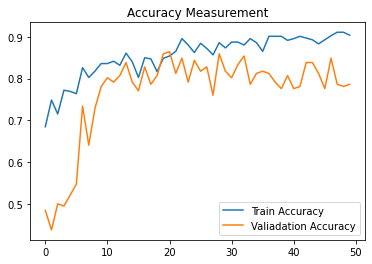

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy Measurement')
plt.legend(['Train Accuracy','Valiadation Accuracy'])
plt.show()

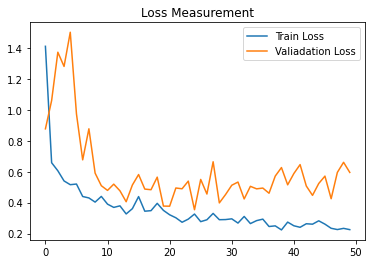

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Measurement')
plt.legend(['Train Loss','Valiadation Loss'])
plt.show()

In [ ]:
loss,acc=model.evaluate_generator(train_generator)
loss,test_acc=model.evaluate_generator(validation_generator)
print("Training ACCURACY = {}\Testing Accuracy = {}".format(acc,test_acc))

Training ACCURACY = 0.9291666746139526\Testing Accuracy = 0.7749999761581421


improvement

In [ ]:
model = models.Sequential()
model.add(layers.BatchNormalization(input_shape=(150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3),strides=(1,1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3),strides=(1,1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3),strides=(1,1),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), strides=(1,1),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_21 (Bat  (None, 150, 150, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_22 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                      

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=720//16,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=200//16)

Epoch 1/50
45/45 [==============================] - 8s 163ms/step - loss: 1.6420 - acc: 0.6569 - val_loss: 1.5470 - val_acc: 0.5052
Epoch 2/50
45/45 [==============================] - 7s 156ms/step - loss: 0.7973 - acc: 0.7125 - val_loss: 1.1899 - val_acc: 0.5000
Epoch 3/50
45/45 [==============================] - 7s 157ms/step - loss: 0.6554 - acc: 0.7681 - val_loss: 1.1904 - val_acc: 0.5052
Epoch 4/50
45/45 [==============================] - 7s 158ms/step - loss: 0.6314 - acc: 0.7583 - val_loss: 1.7299 - val_acc: 0.4948
Epoch 5/50
45/45 [==============================] - 7s 158ms/step - loss: 0.6227 - acc: 0.7639 - val_loss: 1.3145 - val_acc: 0.5052
Epoch 6/50
45/45 [==============================] - 7s 158ms/step - loss: 0.4842 - acc: 0.7833 - val_loss: 1.0500 - val_acc: 0.5208
Epoch 7/50
45/45 [==============================] - 7s 157ms/step - loss: 0.4151 - acc: 0.8139 - val_loss: 0.7083 - val_acc: 0.6823
Epoch 8/50
45/45 [==============================] - 7s 158ms/step - loss: 0.

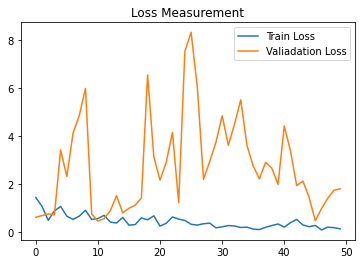

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Measurement')
plt.legend(['Train Loss','Valiadation Loss'])
plt.show()

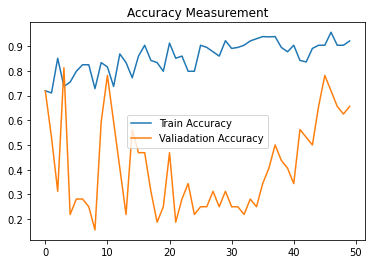

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy Measurement')
plt.legend(['Train Accuracy','Valiadation Accuracy'])
plt.show()

In [ ]:
loss,acc=model.evaluate_generator(train_generator)
loss,test_acc=model.evaluate_generator(validation_generator)
print("Training ACCURACY = {}\Testing Accuracy = {}".format(acc,test_acc))

Training ACCURACY = 0.7846153974533081\Testing Accuracy = 0.6304348111152649


# Using Pre-Trained model VGG16

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# conv_base.trainable = False

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=40,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=20,
      callbacks=[checkpoint_cb])

Epoch 1/10
40/40 [==============================] - 1647s 41s/step - loss: 0.4819 - acc: 0.7740 - val_loss: 0.2302 - val_acc: 0.9060
Epoch 2/10
40/40 [==============================] - 1474s 37s/step - loss: 0.3268 - acc: 0.8610 - val_loss: 0.1999 - val_acc: 0.9180
Epoch 3/10
40/40 [==============================] - 1039s 26s/step - loss: 0.2287 - acc: 0.9025 - val_loss: 0.2729 - val_acc: 0.8970
Epoch 4/10
40/40 [==============================] - 993s 25s/step - loss: 0.2071 - acc: 0.9065 - val_loss: 0.1358 - val_acc: 0.9400
Epoch 5/10
40/40 [==============================] - 1014s 25s/step - loss: 0.1816 - acc: 0.9275 - val_loss: 0.1205 - val_acc: 0.9540
Epoch 6/10
40/40 [==============================] - 1052s 26s/step - loss: 0.1680 - acc: 0.9235 - val_loss: 0.1152 - val_acc: 0.9590
Epoch 7/10
40/40 [==============================] - 1117s 28s/step - loss: 0.1510 - acc: 0.9400 - val_loss: 0.0895 - val_acc: 0.9670
Epoch 8/10
40/40 [==============================] - 1051s 26s/step - l

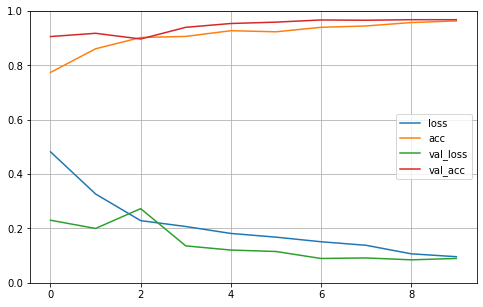

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
hist_df = pd.DataFrame(history.history) 

In [ ]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
model.evaluate_generator(test_generator, steps=50)

[0.1138765827268071, 0.964]